In [1]:
from numpy import *

In [2]:
def loadDataSet(fileName , delim='\t'):
    fr = open(fileName)
    
    stringArr = [line.strip().split(delim) for line in fr.readlines()]
    datArr = [map(float , line) for line in stringArr]
    
    return mat(datArr)

def pca(dataMat , topNfeat = 9999999):
    meanVals = mean(dataMat , axis = 0)
    meanRemoved = dataMat - meanVals
    
    #计算协方差矩阵
    covMat = cov(meanRemoved , rowvar=0)
    
    eigVals , eigVects = linalg.eig(mat(covMat)) #特征值 特征向量
    eigValInd = argsort(eigVals) #排序后的index
    eigValInd = eigValInd[:-(topNfeat+1):-1]
    
    redEigVects = eigVects[: , eigValInd]
    
    lowDDataMat = meanRemoved * redEigVects
    
    reconMat = (lowDDataMat*redEigVects.T) + meanVals
    
    return lowDDataMat , reconMat

In [3]:
dataMat = loadDataSet('../MLiA_SourceCode/Ch13/testSet.txt')

In [4]:
lowDMat , reconMat = pca(dataMat , 1)

In [6]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

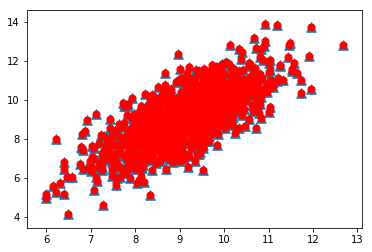

In [15]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten().A[0] , dataMat[: , 1].flatten().A[0] , marker='^' , s=90)
ax.scatter(reconMat[: , 0].flatten().A[0] , reconMat[: , 1].flatten().A[0] , marker='o' , s=50 , c='red')

In [14]:
lowDMat , reconMat = pca(dataMat , 2)

In [16]:
def replaceNanWithMean():
    datMat = loadDataSet('../MLiA_SourceCode/Ch13/secom.data' , ' ')
    numFeat = shape(datMat)[1]
    
    for i in range(numFeat):
        meanVal = mean(datMat[nonzero(~isnan(datMat[:,i].A))[0] , i])
        
        datMat[nonzero(isnan(datMat[: , i].A))[0] , i] = meanVal
    
    return datMat

In [17]:
dataMat =replaceNanWithMean()

In [18]:
meanVals = mean(dataMat , axis = 0)
meanRemoved = dataMat - meanVals

covMat = cov(meanRemoved , rowvar=0)

eigVals , eigVects = linalg.eig(mat(covMat))

In [19]:
eigVals

array([ 5.34151979e+07,  2.17466719e+07,  8.24837662e+06,  2.07388086e+06,
        1.31540439e+06,  4.67693557e+05,  2.90863555e+05,  2.83668601e+05,
        2.37155830e+05,  2.08513836e+05,  1.96098849e+05,  1.86856549e+05,
        1.52422354e+05,  1.13215032e+05,  1.08493848e+05,  1.02849533e+05,
        1.00166164e+05,  8.33473762e+04,  8.15850591e+04,  7.76560524e+04,
        6.66060410e+04,  6.52620058e+04,  5.96776503e+04,  5.16269933e+04,
        5.03324580e+04,  4.54661746e+04,  4.41914029e+04,  4.15532551e+04,
        3.55294040e+04,  3.31436743e+04,  2.67385181e+04,  1.47123429e+04,
        1.44089194e+04,  1.09321187e+04,  1.04841308e+04,  9.48876548e+03,
        8.34665462e+03,  7.22765535e+03,  5.34196392e+03,  4.95614671e+03,
        4.23060022e+03,  4.10673182e+03,  3.41199406e+03,  3.24193522e+03,
        2.74523635e+03,  2.35027999e+03,  2.16835314e+03,  1.86414157e+03,
        1.76741826e+03,  1.70492093e+03,  1.66199683e+03,  1.53948465e+03,
        1.33096008e+03,  